* 完成後請寄到EMAIL : clement.class.02@gmail.com
* 信件主旨請設定為： 05-03.LAB_Automobile_學號_姓名  (例: "05-03.LAB_Automobile_00_陳仁政")
* 附件檔名請設定為： 05-03.LAB_Automobile_學號_姓名.ipynb (例: "05-03.LAB_Automobile_00_陳仁政.ipynb")

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
data = pd.read_csv("../data/Automobile.csv")
data.head(10)

,symboling,Normalized-losses,make,Fuel-type,aspiration,Num-of-doors,Body-style,Drive-wheels,Engine-location,Wheel-base,...,Engine-size,Fuel-system,bore,stroke,Compression-ratio,horsepower,Peak-rpm,City-mpg,Highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0
5,2,NaN,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,15250.0
6,1,158.0,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,17710.0
7,1,NaN,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,18920.0
8,1,158.0,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140.0,5500.0,17,20,23875.0
9,0,NaN,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160.0,5500.0,16,22,NaN


In [2]:
#查看資料筆數跟欄位數目
data.shape

(205, 26)

In [3]:
# 檢查資料欄位的型態，以及缺失狀況
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   Normalized-losses  164 non-null    float64
 2   make               205 non-null    object 
 3   Fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   Num-of-doors       203 non-null    object 
 6   Body-style         205 non-null    object 
 7   Drive-wheels       205 non-null    object 
 8   Engine-location    205 non-null    object 
 9   Wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  Curb-weight        205 non-null    int64  
 14  Engine-type        205 non-null    object 
 15  Num-of-cylinders   205 non-null    object 
 16  Engine-size        205 non

In [4]:
# 計算各欄位資料缺失狀況
data.isnull().sum()

symboling             0
Normalized-losses    41
make                  0
Fuel-type             0
aspiration            0
Num-of-doors          2
Body-style            0
Drive-wheels          0
Engine-location       0
Wheel-base            0
length                0
width                 0
height                0
Curb-weight           0
Engine-type           0
Num-of-cylinders      0
Engine-size           0
Fuel-system           0
bore                  4
stroke                4
Compression-ratio     0
horsepower            2
Peak-rpm              2
City-mpg              0
Highway-mpg           0
price                 4
dtype: int64

In [6]:
# 查看一下資料的基本統計值
data.describe(include='all')

,symboling,Normalized-losses,make,Fuel-type,aspiration,Num-of-doors,Body-style,Drive-wheels,Engine-location,Wheel-base,...,Engine-size,Fuel-system,bore,stroke,Compression-ratio,horsepower,Peak-rpm,City-mpg,Highway-mpg,price
count,205.000000,164.000000,205,205,205,203,205,205,205,205.000000,...,205.000000,205,201.000000,201.000000,205.000000,203.000000,203.000000,205.000000,205.000000,201.000000
unique,NaN,NaN,22,2,2,2,5,3,2,NaN,...,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,toyota,gas,std,four,sedan,fwd,front,NaN,...,NaN,mpfi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,32,185,168,114,96,120,202,NaN,...,NaN,94,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.834146,122.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.756585,...,126.907317,NaN,3.329751,3.255423,10.142537,104.256158,5125.369458,25.219512,30.751220,13207.129353
std,1.245307,35.442168,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.021776,...,41.642693,NaN,0.273539,0.316717,3.972040,39.714369,479.334560,6.542142,6.886443,7947.066342
min,-2.000000,65.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.600000,...,61.000000,NaN,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94.500000,...,97.000000,NaN,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000
50%,1.000000,115.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.000000,...,120.000000,NaN,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,150.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.400000,...,141.000000,NaN,3.590000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000


In [9]:
# 那一個廠牌的車子數量最多？
data['make'].value_counts() # 方法一
data.groupby('make').size().sort_values(ascending=False) # 方法二

make
toyota           32
nissan           18
mazda            17
mitsubishi       13
honda            13
subaru           12
volkswagen       12
volvo            11
peugot           11
dodge             9
mercedes-benz     8
bmw               8
audi              7
plymouth          7
saab              6
porsche           5
isuzu             4
alfa-romero       3
chevrolet         3
jaguar            3
renault           2
mercury           1
dtype: int64

In [ ]:
# 練習題
# 哪一種車型(Body-style)的數量最多？

# Label vs Number

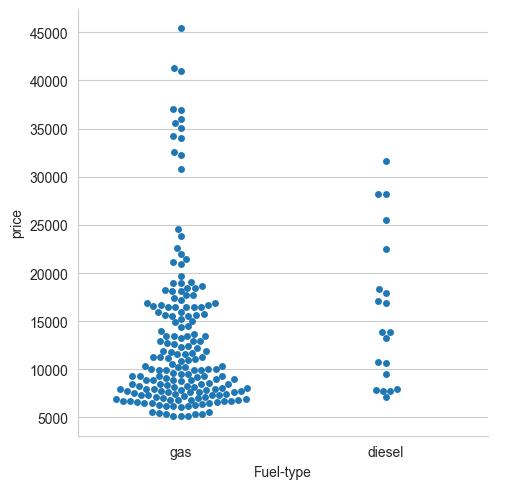

In [12]:
# 畫出不同燃油型態Fuel-type的價格分布
sns.catplot(data=data, x="Fuel-type", y="price", kind="swarm")

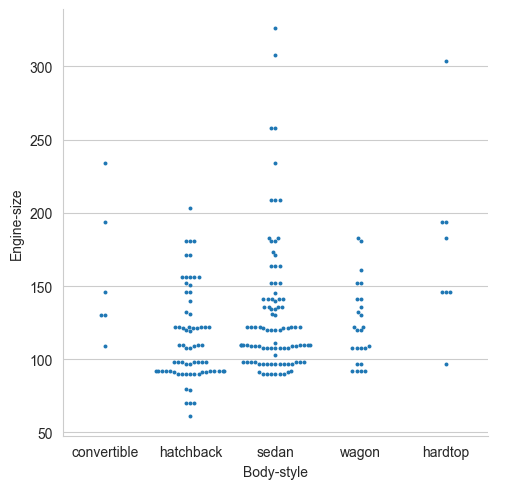

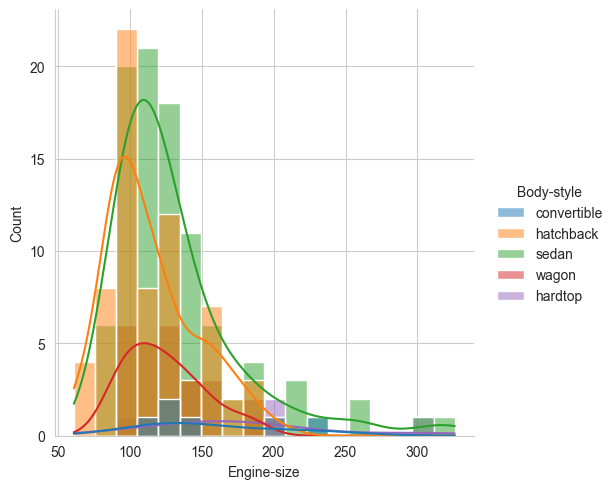

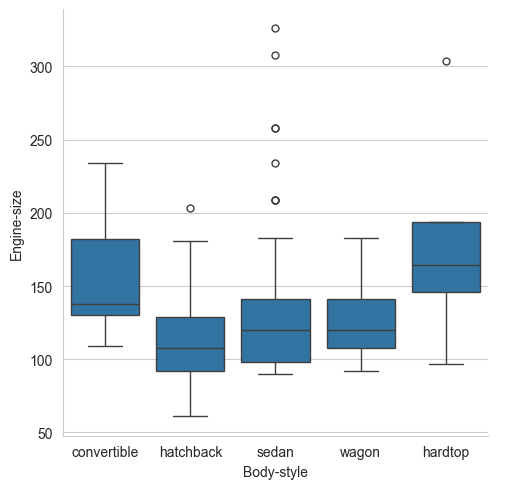

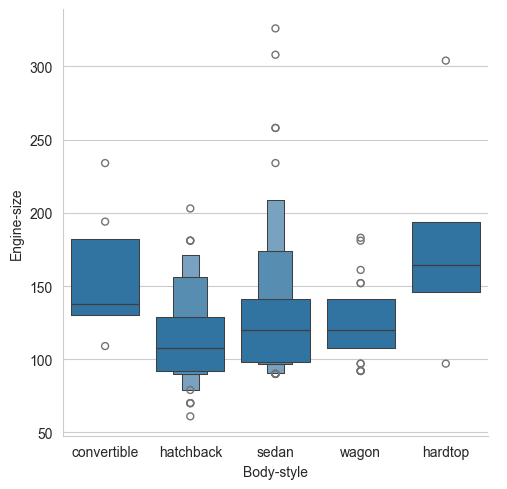

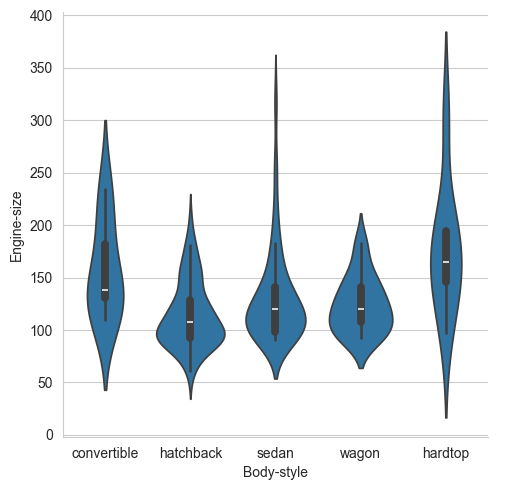

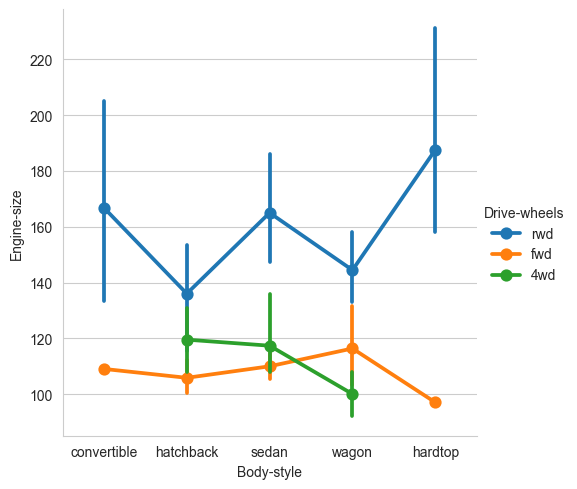

In [76]:
# 找出引擎位置(Body-style)跟引擎大小(Engine-size)之間有沒有關係？
sns.catplot(data, x="Body-style", y="Engine-size", kind="swarm", s=8) #方法1
sns.displot(data, x="Engine-size", hue="Body-style", kde=True) #方法2
sns.catplot(data, x="Body-style", y="Engine-size", kind="box") #方法3
sns.catplot(data, x="Body-style", y="Engine-size", kind="boxen") #方法4
sns.catplot(data, x="Body-style", y="Engine-size", kind="violin") #方法5
sns.catplot(data, x="Body-style", y="Engine-size", kind="point") #方法6
# sns.catplot(data, x="Body-style", y="Engine-size", kind="point", hue='Drive-wheels') #方法7
plt.show()

In [ ]:
# 練習題
# 找出廠牌跟價格之間有沒有關係？

In [ ]:
# 練習題
# 找出Engine-type跟horsepower之間有沒有關係？

# Number vs Number

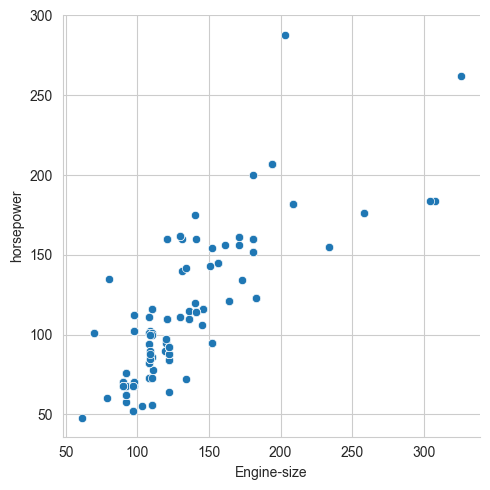

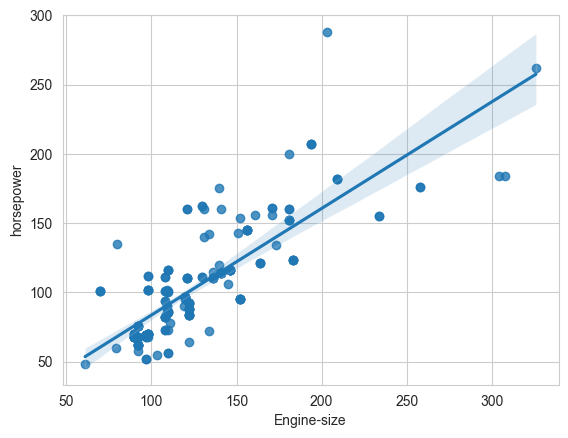

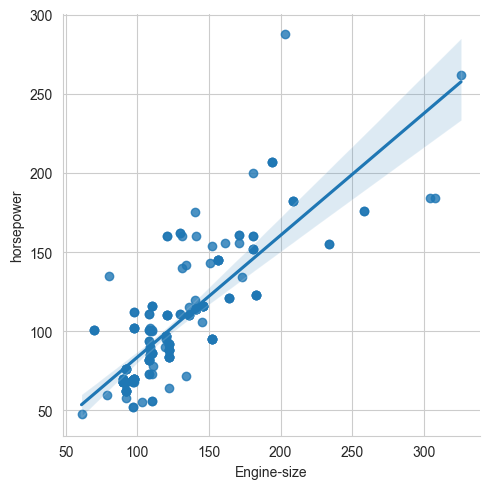

In [48]:
# 找出引擎大小(Engine-size)跟馬力(horsepower)之間有沒有關係？
sns.relplot(data, x="Engine-size", y="horsepower") #方法1
plt.show()
sns.regplot(data, x="Engine-size", y="horsepower") #方法2
plt.show()
sns.lmplot(data, x="Engine-size", y="horsepower") #方法3
plt.show()

In [38]:
# 計算引擎大小(Engine-size)跟馬力(horsepower)之間相關性係數
print('相關性係數=', data['Engine-size'].corr(data['horsepower']) ) # 方法1
print('相關性係數矩陣=', data[['Engine-size', 'horsepower']].corr()) # 方法2

相關性係數= 0.810772555995959
相關性係數矩陣=              Engine-size  horsepower
Engine-size     1.000000    0.810773
horsepower      0.810773    1.000000


In [ ]:
# 練習題
# 找出價格跟馬力之間有沒有關係？


In [ ]:
# 練習題
# 找出價格跟車長之間有沒有關係？

# Label vs Label

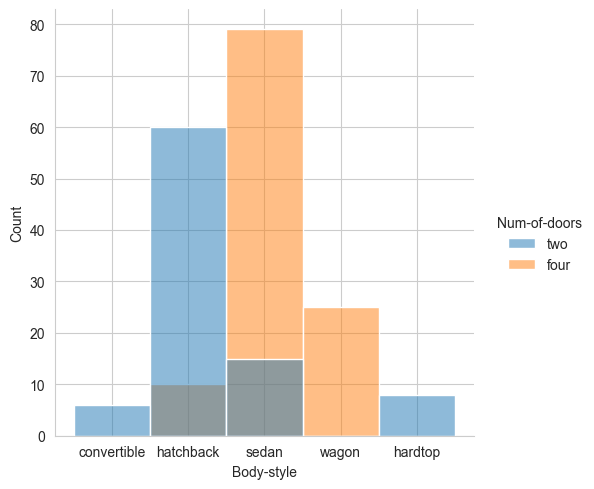

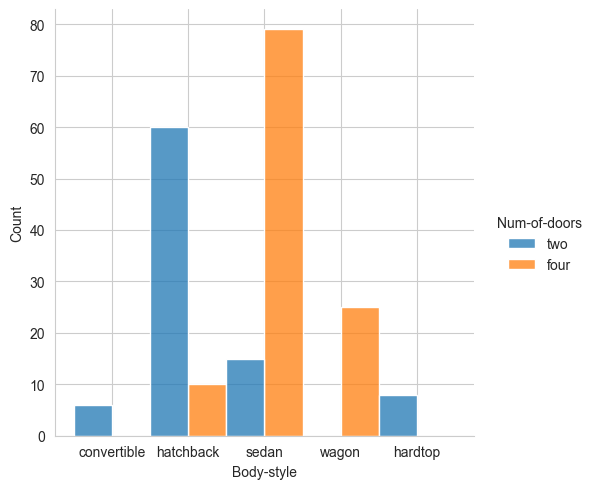

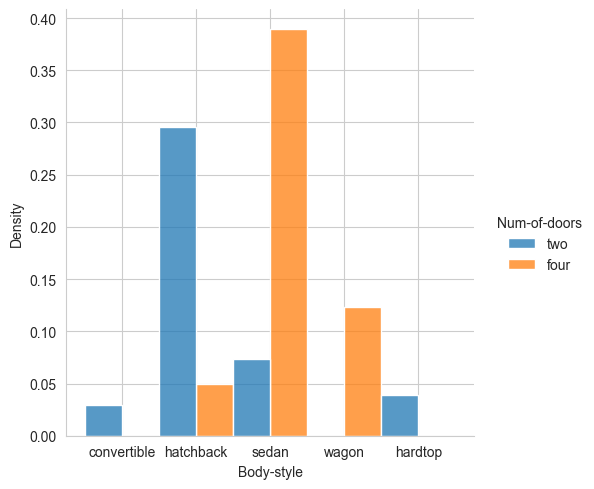

In [72]:
# 找出Body-style跟Num-of-doors的關係
sns.displot(data,x='Body-style', hue='Num-of-doors') #方法1
sns.displot(data,x='Body-style', hue='Num-of-doors', multiple="dodge") #方法2
sns.displot(data,x='Body-style', hue='Num-of-doors', multiple="dodge", stat="density") #方法3

plt.show()

In [80]:
# 計算Body-style跟Num-of-doors的計數矩陣
data.groupby(['Body-style','Num-of-doors']).size().unstack(fill_value=0)

Num-of-doors,four,two
Body-style,,
convertible,0,6
hardtop,0,8
hatchback,10,60
sedan,79,15
wagon,25,0


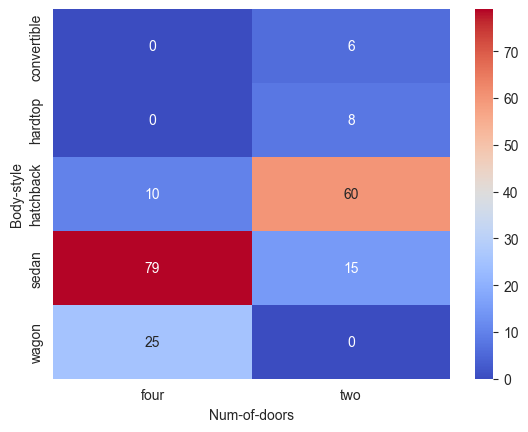

In [90]:
# 畫出上個表格的熱圖
matrix = data.groupby(['Body-style','Num-of-doors']).size().unstack(fill_value=0)
sns.heatmap(matrix, annot=True, cmap='coolwarm', cbar=True)
plt.show()

In [ ]:
# 練習題
# 找出Body-style跟廠牌的關係

# Group By

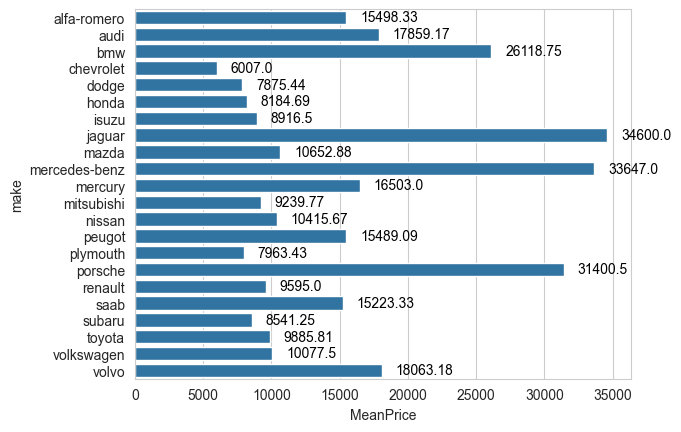

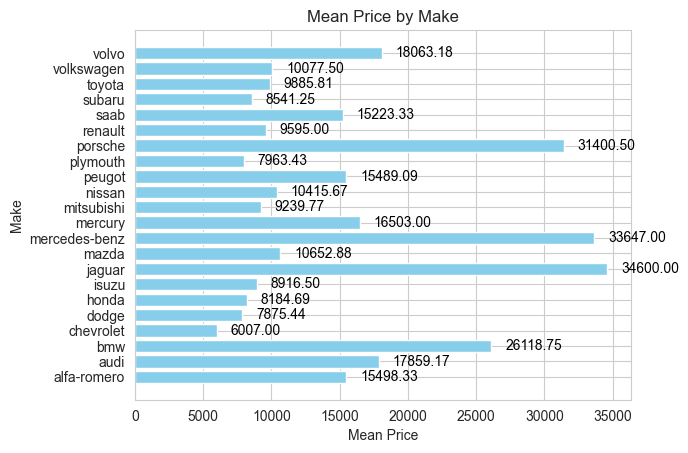

In [63]:
# 計算不同廠牌汽車的平均價格，並畫出來

#方法一
mean_price = data.groupby('make')['price'].mean().reset_index(name='MeanPrice') 
ax = sns.barplot(mean_price, x='MeanPrice', y='make')
for index, row in mean_price.iterrows():
    ax.text(row['MeanPrice'] + 1000,  # 偏移量，確保數字不會跟條形重疊
            index, 
            round(row['MeanPrice'], 2),  # 顯示價格，保留兩位小數
            color='black',
            ha="left",  # 水平對齊
            va="center")  # 垂直對齊
plt.show()


#方法二
mean_price = data.groupby('make')['price'].mean().reset_index(name='MeanPrice') 
bars = plt.barh(mean_price['make'], mean_price['MeanPrice'], color='skyblue')
# 在每個條形上顯示 MeanPrice 的數值
for bar in bars:
    # 使用 bar.get_width() 來獲取每個條形的長度（即價格）
    width = bar.get_width()
    plt.text(width + 1000,  # 偏移量，確保數字不會跟條形重疊
             bar.get_y() + bar.get_height() / 2,  # 垂直位置
             f'{width:.2f}',  # 顯示價格，保留兩位小數
             color='black',
             va='center')  # 垂直對齊

# 顯示圖表
plt.xlabel('Mean Price')
plt.ylabel('Make')
plt.title('Mean Price by Make')
plt.show()

In [ ]:
# 練習題
# 修改上圖將平均價格由高到低排序

In [ ]:
# 練習題
# 計算不同車型的平均馬力

In [ ]:
# 練習題
# 找出車長與車種之間是否有關係？

In [ ]:
# 練習題
# 找出不同車廠對於生產車子Body-style是否有偏好？

In [ ]:
# 練習題
# 找出Body-style是否會影響車價？

In [ ]:
# 練習題
# 找出最高時數跟馬力之間是否有關係？

In [ ]:
# 練習題
# 根據 車廠與車型(Body-style)的不同，計算各個組合的平均價格